<a href="https://colab.research.google.com/github/WilliamLu1999/Data-Projects/blob/main/reddit_api_sentiment_analysis_spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on Reddit's API Charging Policy

### Table of Contents
* [Introduction](#section-1)
* [Ask: Questions, Hypothesis](#section-2)
* [Prepare: Fetch Data](#section-3)
* [Process: Clean Data](#section-4)
* [Analyze: Sentiment Analysis and Visualizations](#section-5)
* [Share: Insights](#section-6)
* [Act: Web Application](#section-7)



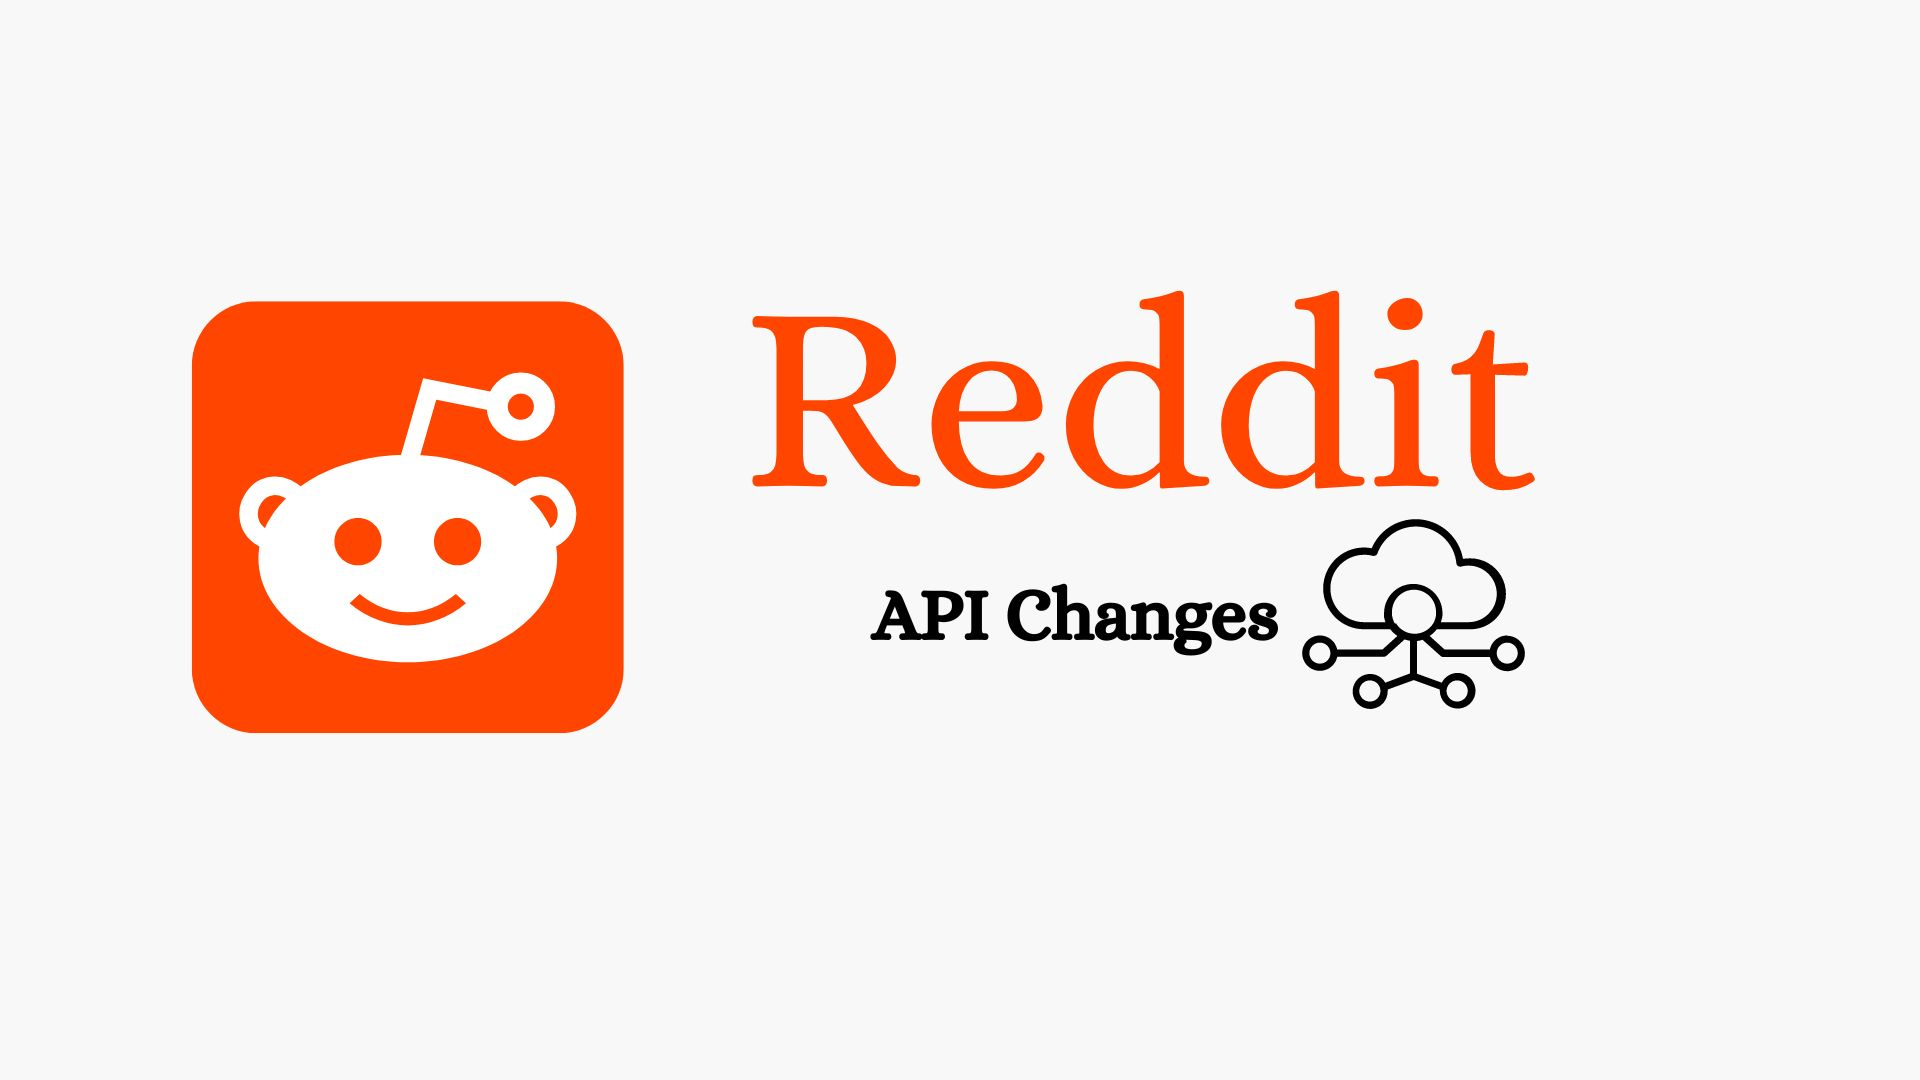


*Retrieved from: https://blogiestools.com/reddit-api-changes/*


<a id="section-1"></a>
### Introduction

*A. Backgroud*


Reddit is one of the biggest social media platforms that consists tons of niches (subreddits), covering a myriad of topics. Users (redditors) can create, share, comment, vote,etc. contents on Reddit.

*B. What happened?*

However, in April 2023, Reddit announced a new policy, which mainly stated that Reddit would start to charge third-party-applications for using its application-programming interface (API). API is a way for two or more computer programs to communicate with each other. It is a type of software interface, offering a service to other pieces of software. <wiki> Reddit's API was free to use since 2005 till 2023.

Now many applications that provide great service by adopting the free use of Reddit's API before are starting to shut down. For example, Apollo ReddPlanet and Sync (both are applications that provide a smooth and beautiful interface for browsing Reddit contents). Besides business shutting down, redditors also protest against this move -- nearly 9,000 subreddits went dark as an act of rebellion starting June 12, some of which with 30 million subscribers.


*C. Why this happened?*

According to Reddit CEO Steve Huffman, big tech companies such as Google, Microsoft, and OpenAI are using Reddit's contents to train LLM and for other AI usage freely. It's unsustainable if Reddit continues not charging any cost for its API.


*D. Souces:*

https://www.entrepreneur.com/business-news/reddit-blackout-protests-explained-api-changes-ceo-and/454629

https://www.zdnet.com/article/reddit-is-in-danger-of-a-death-spiral/


<a id="section-2"></a>
### Ask: Questions, Hypothesis
A. Questions

1.   What are the major sentiments of this topic?
2.   What do people response regards to this problem?
3.   Is it a good move or a bad move for Reddit?

B. Hypothesis


1.   Angry and disappointment are the main sentiments of the comments.
2.   People will use them less frequently according to their comments; they will surf other websites as a substitution.
3.   It's in general a bad move at first, but the problem will be sorted out as time goes by since users rely on Reddit too much. Reddit's contents are great in many ways.




<a id="section-3"></a>
### Prepare: Fetch Data


To fetch the appropriate data, I use the YouTube API, which is free in contrast, to download comments from several videos about Reddit's API charging policy and change.

In [47]:
from google.colab import drive
drive.mount('/content/drive')

# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv

# import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import for sentiment analysis
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

# fetch YouTube Data
from googleapiclient.discovery import build

Mounted at /content/drive


In [53]:
from googleapiclient.discovery import build
# Youtube API Key is stored in this text file. Not directly using it for safety reason.
with open('/content/drive/MyDrive/data/youtube_API.txt', 'r') as file:
    file_content = file.read()

api_key = str(file_content)

def get_video_comments(video_id):
    youtube = build('youtube', 'v3', developerKey=api_key)

    comments = []
    nextPageToken = None

    while True:
        response = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            maxResults=100,
            pageToken=nextPageToken
        ).execute()

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comments.append(comment)

        nextPageToken = response.get('nextPageToken')

        if not nextPageToken:
            break

    return comments

# Enter video ID
video_id1 = "Ch6zNEq9fwM"

# Call the function to retrieve comments
comments1 = get_video_comments(video_id1)

In [54]:
video_id2 = "fBruoybHryU"
comments2 = get_video_comments(video_id2)
video_id3 = "VO-iMK-1ljY"
comments3 = get_video_comments(video_id3)
video_id4 = "vGG_zmcSHJo"
comments4 = get_video_comments(video_id4)
video_id5 = "U06rCBIKM5M"
comments5 = get_video_comments(video_id5)
video_id6 = "nXYOdnn_FLo"
comments6 = get_video_comments(video_id6)
video_id7 = "LxlVe1xwPQc"
comments7 = get_video_comments(video_id7)
comments = comments1+comments2+comments3+comments4+comments5+comments6+comments7
# Specify the output CSV file path on Google Drive
csv_file_path = '/content/drive/MyDrive/data/reddit_api_comments.csv'

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(comments)
df = pd.DataFrame(comments, columns=['comments'])
df

,comments
0,What&#39;s wrong with the regular reddit app? ...
1,As a non-redditor who ends up on reddit becaus...
2,First
3,Mods need to get over themselves.
4,I never thought thatr deleting my account woul...
...,...
5892,first?
5893,Jesus this is stupid
5894,17 seconds lmaoo
5895,rip


<a id="section-4"></a>
### Process: Clean Data


<a id="section-5"></a>
### Analyze: Sentiment Analysis & Visualizations

<a id="section-6"></a>
### Share: Insights


<a id="section-7"></a>
### Act: Web Applications